In [146]:
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [147]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [148]:
zip_dir_base = os.path.dirname(zip_dir)

base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [149]:
train_ds = keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                         labels='inferred', 
                                                         label_mode='binary', 
                                                         batch_size=64,
                                                         shuffle = True
                                                        )

Found 2000 files belonging to 2 classes.


In [150]:
val_ds = keras.preprocessing.image_dataset_from_directory(directory = validation_dir,
                                                         labels='inferred', 
                                                         label_mode='binary', 
                                                         batch_size=64,
                                                         shuffle = True
                                                        )

Found 1000 files belonging to 2 classes.


In [151]:
classes = train_ds.class_names
print(classes)

['cats', 'dogs']


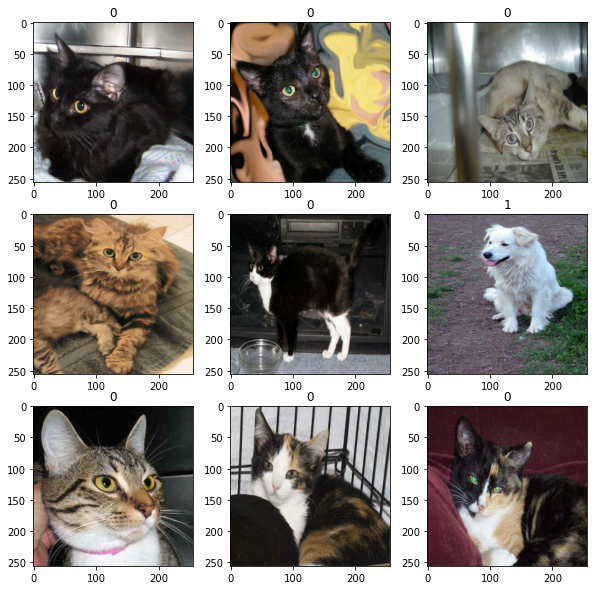

In [152]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))

In [153]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(256, 256, 3)),
    keras.layers.experimental.preprocessing.Rescaling(1./255),
    
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D((2, 2), padding='same'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, 'relu'),
    keras.layers.Dense(1024, 'relu'),
    keras.layers.Dense(1, 'sigmoid')
])


In [154]:
model.compile('adam', 'binary_crossentropy', ['accuracy'])

In [155]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)       

In [157]:
model.fit(x=train_ds, epochs=12, batch_size=64, validation_data=val_ds)

Epoch 1/12
32/32 [==============================] - 35s 1s/step - loss: 0.7496 - accuracy: 0.5040 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/12
32/32 [==============================] - 32s 1000ms/step - loss: 0.6933 - accuracy: 0.5035 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/12
32/32 [==============================] - 31s 954ms/step - loss: 0.6911 - accuracy: 0.5445 - val_loss: 0.6798 - val_accuracy: 0.5720
Epoch 4/12
32/32 [==============================] - 30s 948ms/step - loss: 0.6846 - accuracy: 0.5375 - val_loss: 0.6452 - val_accuracy: 0.6320
Epoch 5/12
32/32 [==============================] - 31s 974ms/step - loss: 0.6867 - accuracy: 0.5420 - val_loss: 0.6921 - val_accuracy: 0.5680
Epoch 6/12
32/32 [==============================] - 31s 965ms/step - loss: 0.6486 - accuracy: 0.6195 - val_loss: 0.6468 - val_accuracy: 0.6050
Epoch 7/12
32/32 [==============================] - 30s 946ms/step - loss: 0.5685 - accuracy: 0.7150 - val_loss: 0.5765 - val_accuracy: 0.7100
E

Text(0.5, 1.0, 'Loss')

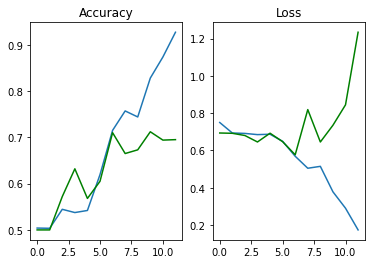

In [158]:
epochs = range(12)

acc = model.history.history['accuracy']
loss = model.history.history['loss']

val_acc = model.history.history['val_accuracy']
val_loss = model.history.history['val_loss']

ax = plt.subplot(1, 2, 1)
plt.plot(epochs, acc)
plt.plot(epochs, val_acc, c='g')
plt.title('Accuracy')

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss, c='g')
plt.title('Loss')

dog = (256, 256)
cat = (256, 256)


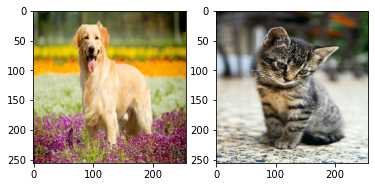

In [159]:
dogimg = keras.preprocessing.image.load_img(path='test_pics/dog.jpg', target_size=(256, 256, 3))
catimg = keras.preprocessing.image.load_img(path='test_pics/cat.jpeg', target_size=(256, 256, 3))

print('dog =', dogimg.size)

print('cat =', catimg.size)

ax = plt.subplot(1, 2, 1)
plt.imshow(dogimg)
ax = plt.subplot(1, 2, 2)
plt.imshow(catimg)

In [160]:
imgs = np.array([np.asarray(dogimg, dtype='uint8'), np.asarray(catimg, dtype='uint8')])
print(imgs.shape)

(2, 256, 256, 3)


In [168]:
pred = [classes[1] if i > 0.5 else classes[0] for i in model.predict(imgs)]

In [169]:
pred

['dogs', 'cats']